# 1D advection equation

$$
\begin{aligned}
    & \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0,\quad t\in[0,1],\ x\in (0, 2\pi),\\
    & u(0,x) = g(x), \quad x\in(0, 2\pi)
\end{aligned}
$$

For this example, we set $c=80$ and $g(x) = \sin(x)$.

Periodic boundary condition
$$

$$

In [12]:
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt

In [4]:
def get_dataset(T=2.0, L=2 * jnp.pi, c=50, n_t=200, n_x=128):
    t_star = jnp.linspace(0, T, n_t)
    x_star = jnp.linspace(0, L, n_x)

    u_exact_fn = lambda t, x: jnp.sin(jnp.mod(x - c * t, L))

    u_exact = vmap(vmap(u_exact_fn, (None, 0)), (0, None))(t_star, x_star)

    return u_exact, t_star, x_star

In [5]:
# Get dataset
T = 1.0  # final time
L = 2 * jnp.pi  # length of the domain
c = 80  # advection speed
n_t = 200  # number of time steps
n_x = 128  # number of spatial points

u_ref, t_star, x_star = get_dataset(T, L, c, n_t, n_x)

In [6]:
# solution : (n_t, n_x)
print(u_ref.shape)
print(u_ref)

(200, 128)
[[ 0.          0.04945372  0.09878642 ... -0.09878645 -0.04945388
   0.        ]
 [-0.3912687  -0.34527898 -0.2984443  ... -0.48026586 -0.43630135
  -0.3912687 ]
 [-0.7201509  -0.684958   -0.6480889  ... -0.7851683  -0.7535818
  -0.7201509 ]
 ...
 [ 0.610083    0.5701502   0.5288285  ...  0.6853733   0.64852077
   0.6100811 ]
 [ 0.87146103  0.84613794  0.8187484  ...  0.9156509   0.89465016
   0.87145984]
 [ 0.9938884   0.9872127   0.9781224  ...  0.999932    0.9981315
   0.99388814]]


In [7]:
# time : (n_t, )
print(t_star.shape)
print(t_star)

(200,)
[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.040201   0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055277 0.11557789
 0.12060301 0.12562814 0.13065326 0.1356784  0.14070351 0.14572865
 0.15075377 0.1557789  0.16080402 0.16582914 0.17085427 0.17587939
 0.18090452 0.18592964 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120602 0.24623115 0.2512563  0.2562814  0.26130652 0.26633164
 0.2713568  0.2763819  0.28140703 0.28643215 0.2914573  0.2964824
 0.30150753 0.30653265 0.3115578  0.31658292 0.32160804 0.32663316
 0.33165827 0.33668342 0.34170854 0.34673366 0.35175878 0.35678393
 0.36180905 0.36683416 0.37185928 0.37688443 0.38190955 0.38693467
 0.3919598  0.39698493 0.40201005 0.40703517 0.4120603  0.4170854
 0.42211056 0.42713568 0.4321608  0.4371859  0.44221106 0.

In [8]:
# space : (n_x, )
print(x_star.shape)
print(x_star)

(128,)
[0.        0.0494739 0.0989478 0.1484217 0.1978956 0.2473695 0.2968434
 0.3463173 0.3957912 0.4452651 0.494739  0.5442129 0.5936868 0.6431607
 0.6926346 0.7421085 0.7915824 0.8410563 0.8905302 0.9400041 0.989478
 1.0389519 1.0884258 1.1378998 1.1873736 1.2368475 1.2863214 1.3357953
 1.3852692 1.4347432 1.484217  1.5336909 1.5831648 1.6326387 1.6821126
 1.7315865 1.7810605 1.8305343 1.8800082 1.9294821 1.978956  2.02843
 2.0779037 2.1273777 2.1768515 2.2263255 2.2757995 2.3252733 2.3747473
 2.424221  2.473695  2.5231688 2.5726428 2.6221168 2.6715906 2.7210646
 2.7705383 2.8200123 2.8694863 2.91896   2.968434  3.0179079 3.0673819
 3.1168556 3.1663296 3.2158036 3.2652774 3.3147514 3.3642251 3.4136992
 3.463173  3.512647  3.562121  3.6115947 3.6610687 3.7105424 3.7600164
 3.8094904 3.8589642 3.9084382 3.957912  4.0073857 4.05686   4.1063337
 4.1558075 4.2052817 4.2547555 4.3042293 4.353703  4.4031773 4.452651
 4.502125  4.551599  4.601073  4.6505466 4.7000203 4.7494946 4.7989683
 4.

In [9]:
# solution at t=0 : (n_x, )
u0 = u_ref[0, :]
print(u0.shape)
print(u0)

(128,)
[ 0.          0.04945372  0.09878642  0.14787738  0.19660644  0.24485438
  0.29250312  0.33943605  0.38553834  0.43069717  0.47480196  0.51774484
  0.55942076  0.59972763  0.6385669   0.67584354  0.71146613  0.7453478
  0.7774054   0.80756056  0.8357395   0.8618732   0.88589776  0.9077544
  0.9273897   0.9447554   0.9598091   0.9725141   0.98283917  0.990759
  0.9962544   0.9993117   0.9999235   0.99808836  0.9938107   0.9871011
  0.97797585  0.9664573   0.9525737   0.936359    0.9178529   0.8971005
  0.87415296  0.8490661   0.8219015   0.7927255   0.7616095   0.7286299
  0.6938671   0.6574064   0.6193367   0.5797517   0.53874767  0.4964252
  0.45288813  0.40824258  0.3625982   0.31606627  0.26876086  0.22079797
  0.17229453  0.12336968  0.07414269  0.02473451 -0.02473445 -0.07414287
 -0.12336962 -0.1722947  -0.22079791 -0.26876104 -0.3160662  -0.36259815
 -0.40824276 -0.4528881  -0.49642533 -0.53874755 -0.57975155 -0.61933684
 -0.65740633 -0.69386715 -0.7286299  -0.76160944 -0.

In [16]:
t_star[0]

Array(0., dtype=float32)

In [17]:
t_star[1]

Array(0.00502513, dtype=float32)

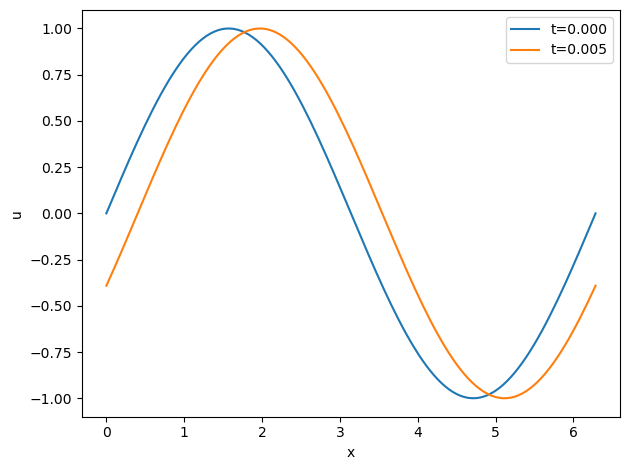

In [23]:
# solution at specific time (n_x,)
fig = plt.figure()
plt.plot(x_star, u_ref[0, :], label=f't={t_star[0]:.3f}')
plt.plot(x_star, u_ref[1, :], label=f't={t_star[1]:.3f}')
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.tight_layout()

In [11]:
TT, XX = jnp.meshgrid(t_star, x_star, indexing="ij")
print(TT.shape)
print(XX.shape)

(200, 128)
(200, 128)


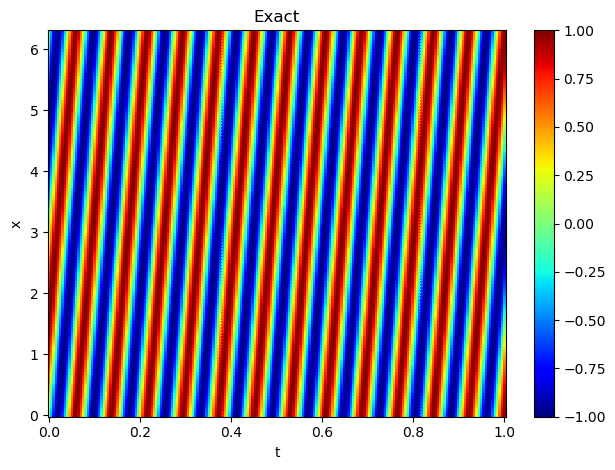

In [14]:
# solution in (t, x)-plane
fig = plt.figure()
plt.pcolor(TT, XX, u_ref, cmap="jet")
plt.colorbar()
plt.xlabel("t")
plt.ylabel("x")
plt.title("Exact")
plt.tight_layout()

## What is vmap?

In [28]:
# function at (t, x)
u_exact_fn = lambda t, x: jnp.sin(x - c * t)

In [49]:
ts = jnp.array([1, 2, 3])
xs = jnp.array([4, 5, 6])

# calculate at a specific point
print(
    u_exact_fn(1, 4), u_exact_fn(1, 5), u_exact_fn(1, 6)
    )

print()
# calculate using array
print(
    u_exact_fn(ts, xs)
    )

print()
# calculate using vmap (2nd axis)
print(
    vmap(u_exact_fn, (None, 0))(1, xs)
    )

-0.56610763 0.38778165 0.9851463

[-0.56610763  0.873312   -0.99881667]

[-0.56610763  0.38778165  0.9851463 ]


In [47]:
# calculate using vmap (2nd axis)
print(
    vmap(u_exact_fn, (None, 0))(1, xs)
    )
print(
    vmap(u_exact_fn, (None, 0))(2, xs)
    )
print(
    vmap(u_exact_fn, (None, 0))(3, xs)
    )

print()
# calculate using vmap & vmap (1st & 2nd axis)
print(
    vmap(vmap(u_exact_fn, (None, 0)), (0, None))(ts, xs)
    )

[-0.56610763  0.38778165  0.9851463 ]
[0.8817846  0.873312   0.06192034]
[ 0.3714321  -0.5805867  -0.99881667]

[[-0.56610763  0.38778165  0.9851463 ]
 [ 0.8817846   0.873312    0.06192034]
 [ 0.3714321  -0.5805867  -0.99881667]]


## Why mod?

periodic boundary condition

In [53]:
jnp.mod(6, 4)

Array(2, dtype=int32, weak_type=True)

: 

In [ ]:
jnp.sin(x_star[5] - c * t_star[5])

Array(-0.97076386, dtype=float32)

In [ ]:
jnp.mod(x_star[5] - c * t_star[5], L)

Array(3.1868, dtype=float32)

In [ ]:
jnp.sin(jnp.mod(x_star[5] - c * t_star[5], L))

Array(-0.04519195, dtype=float32)

In [ ]:
u_exact_fn_L = lambda t, x: jnp.sin(jnp.mod(x - c * t, L))

In [ ]:
u_ref_L = vmap(vmap(u_exact_fn_L, (None, 0)), (0, None))(t_star, x_star)

In [ ]:
u_ref.shape

(200, 128)

In [ ]:
import matplotlib.pyplot as plt

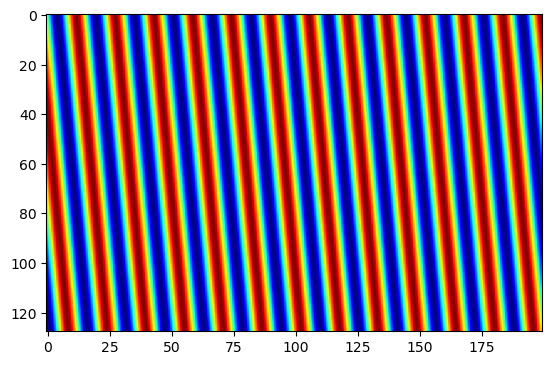

In [ ]:
plt.imshow(u_ref.T, cmap="jet")
plt.show()

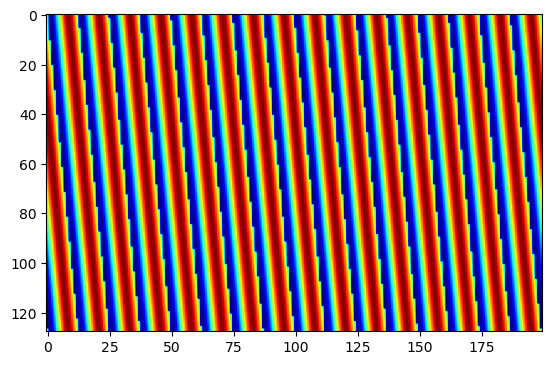

In [ ]:
plt.imshow(u_ref_L.T, cmap="jet")
plt.show()

In [ ]:
TT, XX = jnp.meshgrid(t_star, x_star, indexing='ij')

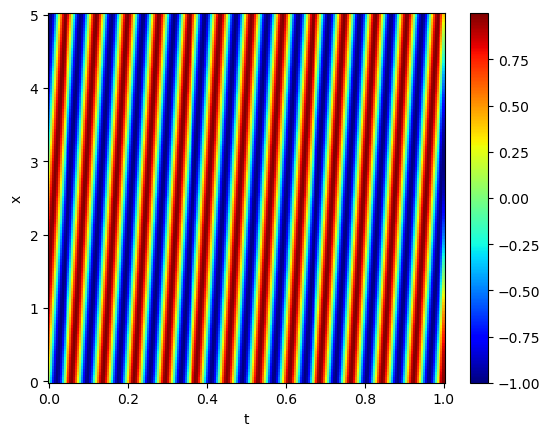

In [ ]:
plt.pcolor(TT, XX, u_ref, cmap='jet')
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()
plt.show()

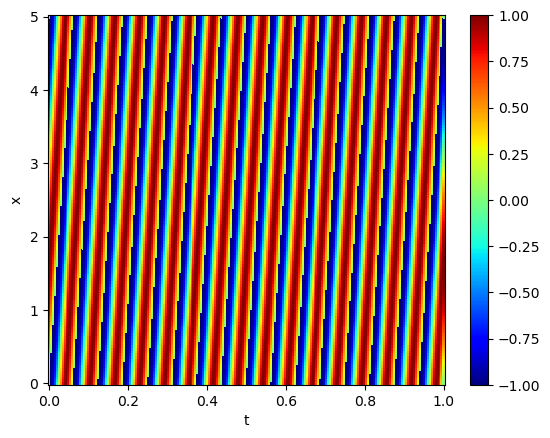

In [ ]:
plt.pcolor(TT, XX, u_ref_L, cmap='jet')
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()
plt.show()

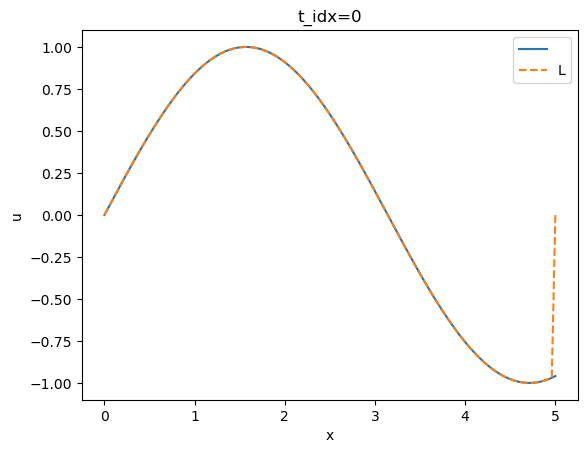

In [ ]:
t_idx = 0

plt.plot(x_star, u_ref[t_idx, :], label=' ')
plt.plot(x_star, u_ref_L[t_idx, :], '--', label='L')
plt.title(f't_idx={t_idx}')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

In [ ]:
def g(x):
    return (x)

In [ ]:
interact(g, x=widgets.IntSlider(min=-10, max=30, step=1, value=10))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.g(x)>

In [ ]:
def f(t_idx):
    plt.plot(x_star, u_ref[t_idx, :], label=' ')
    plt.plot(x_star, u_ref_L[t_idx, :], '--', label='L')
    plt.title(f't_idx={t_idx}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend()
    plt.show()

In [ ]:
interact(f, t_idx=widgets.IntSlider(min=0, max=n_t-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t_idx', max=199), Output()), _dom_classes=('widget-inter…

<function __main__.f(t_idx)>

<matplotlib.colorbar.Colorbar>

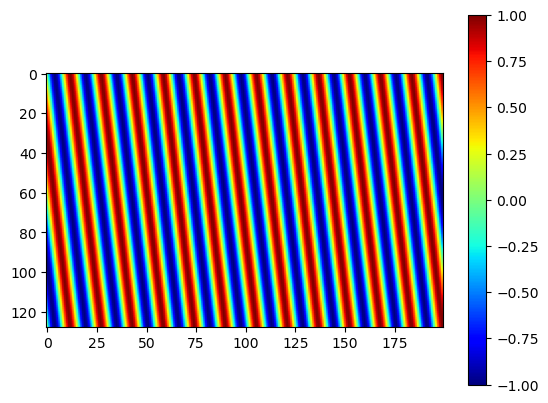

In [ ]:
# Problem setup
T = 1.0  # final time
L = 2 * jnp.pi  # length of the domain
c = 80  # advection speed
n_t = 200  # number of time steps
n_x = 128  # number of spatial points

def get_dataset(T=2.0, L=2 * jnp.pi, c=50, n_t=200, n_x=128):
    t_star = jnp.linspace(0, T, n_t)
    x_star = jnp.linspace(0, L, n_x)

    u_exact_fn = lambda t, x: jnp.sin(jnp.mod(x - c * t, L))

    u_exact = vmap(vmap(u_exact_fn, (None, 0)), (0, None))(t_star, x_star)

    return u_exact, t_star, x_star

u_ref, t_star, x_star = get_dataset(T, L, c, n_t, n_x)

plt.imshow(u_ref.T, cmap="jet", vmin=-1, vmax=1)
plt.colorbar()